In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import pandas.tseries
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import itertools
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('zillow_data.csv')

In [2]:
final_cities = ['Aurora','Greeley','Lakewood','Fort Worth','Everett','Seattle','Lehigh Acres','Sky Lake']

In [95]:
topzips = [32809,98203,80215,80631,76131,49507,80012 ]

In [96]:
final_zips = df.loc[df['RegionName'].isin(topzips)].drop(columns=['RegionID','City', 'CountyName', 'Metro', 'State','SizeRank'],
                                           axis=1).groupby('RegionName').mean()
final_zips = pd.DataFrame(final_zips.reset_index())
columns = list(final_zips.T.iloc[0])
final_zips = final_zips.T
final_zips.columns = columns
final_zips.columns = final_zips.columns.astype(np.int).astype('str')
final_zips = final_zips[1:]
final_zips = final_zips.set_index(pd.to_datetime(final_zips.index))
final_zips = final_zips.applymap(lambda x: round(np.float(x),2))
final_zips

,32809,49507,76131,80012,80215,80631,98203
1996-04-01,71700.0,49700.0,117400.0,111900.0,152000.0,86500.0,136800.0
1996-05-01,71700.0,51000.0,117300.0,112000.0,152700.0,87000.0,136500.0
1996-06-01,71800.0,52300.0,117300.0,112200.0,153600.0,87500.0,136300.0
1996-07-01,71800.0,53500.0,117300.0,112300.0,154400.0,87900.0,136300.0
1996-08-01,71800.0,54600.0,117600.0,112500.0,155300.0,88400.0,136300.0
...,...,...,...,...,...,...,...
2017-12-01,171400.0,106600.0,195800.0,307400.0,463700.0,217700.0,380100.0
2018-01-01,174800.0,107800.0,197100.0,311300.0,467300.0,220400.0,384300.0
2018-02-01,177800.0,108900.0,198700.0,314800.0,471400.0,223600.0,388900.0
2018-03-01,180900.0,110200.0,200600.0,318600.0,476200.0,226900.0,395700.0


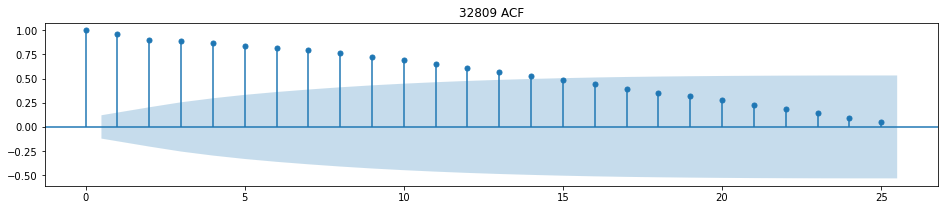

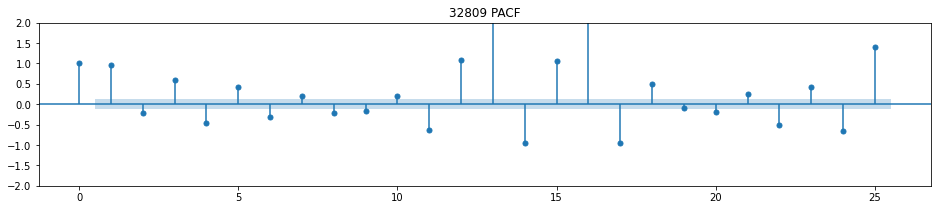

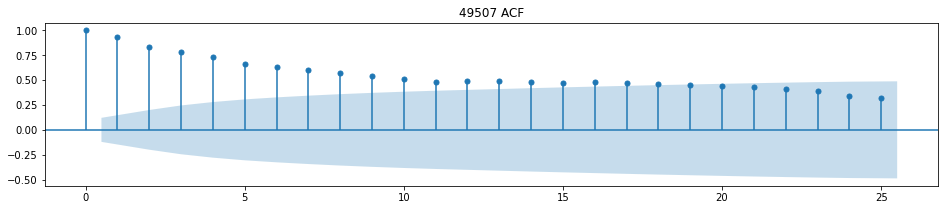

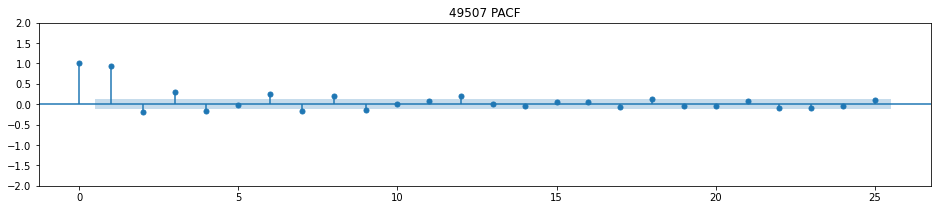

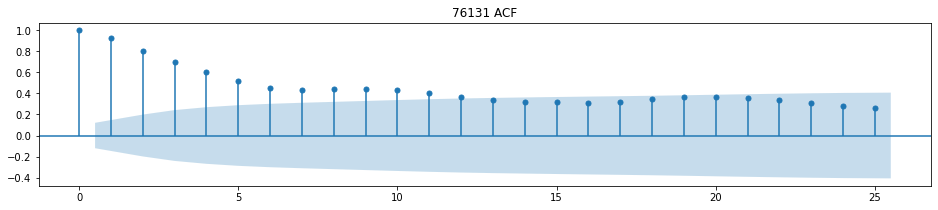

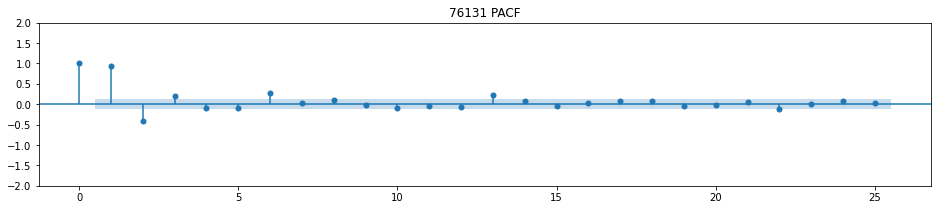

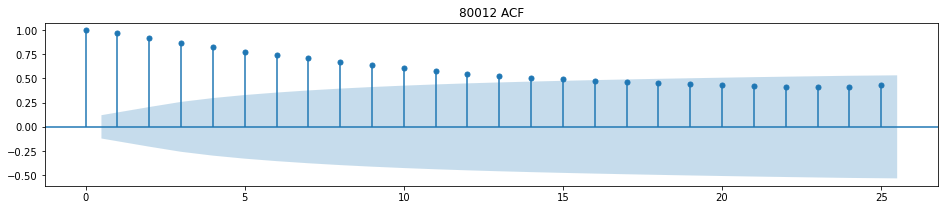

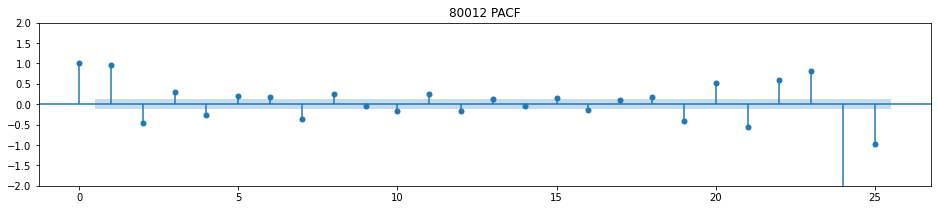

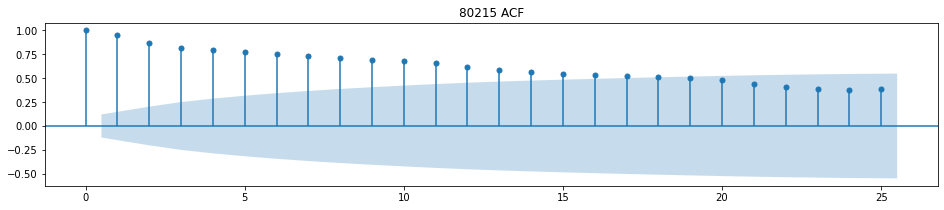

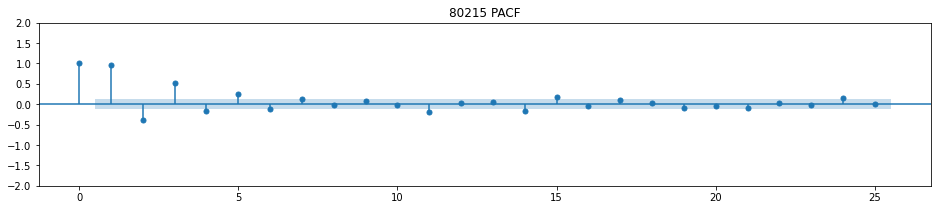

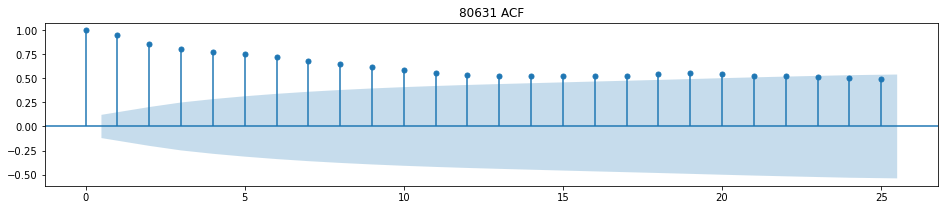

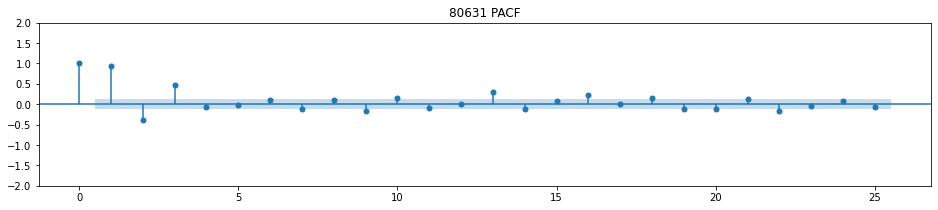

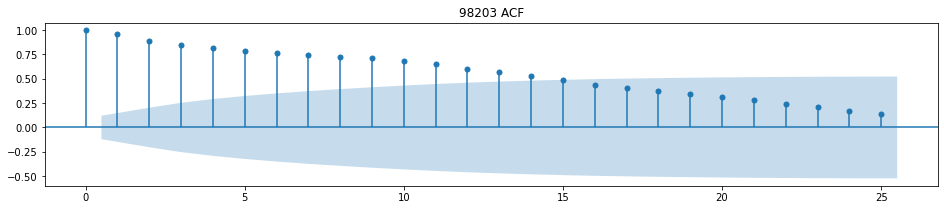

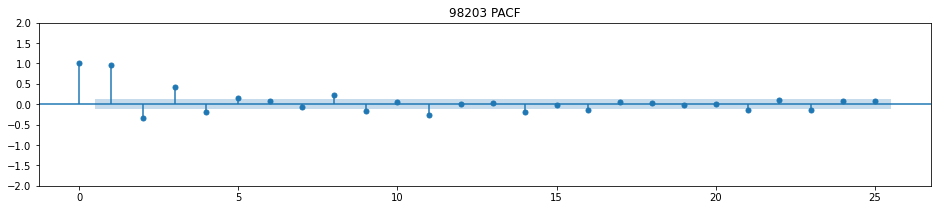

In [97]:
for idx,x in enumerate(final_zips.columns):
    y = final_zips[x].diff(periods=1).dropna()
    fig,ax = plt.subplots(figsize=(16,3))
    plot_acf(y,ax=ax,lags=25)
    plt.title('{} ACF'.format(x))
    fig1,ax1 = plt.subplots(figsize=(16,3))
    plot_pacf(y,ax=ax1,lags=25)
    plt.title('{} PACF'.format(x))
    plt.ylim(-2,2)

In [6]:
#for CO
p_80215 = range(0,3)
d_80215 = range(0,3)
q_80215 = range(0,6)


pdq = list(itertools.product(p_80215,d_80215,q_80215))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_80215,d_80215,q_80215))]

len(pdq),len(pdqs)

(54, 54)

In [7]:
#for fort worth
p_76131 = range(0,4)
d_76131 = range(0,3)
q_76131 = range(0,5)


pdq = list(itertools.product(p_76131,d_76131,q_76131))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_76131,d_76131,q_76131))]

len(pdq),len(pdqs)

(60, 60)

In [10]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(final_zips['76131'],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           simple_differencing=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
        except:
            continue

In [11]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 2, 4)
pdqs    (1, 2, 4, 12)
aic           2679.33
Name: 869, dtype: object

In [8]:
#for Sky Lake 98108
p_98108 = range(0,5)
d_98108 = range(0,3)
q_98108 = range(0,4)

pdq = list(itertools.product(p_98108,d_98108,q_98108))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_98108,d_98108,q_98108))]

len(pdq),len(pdqs)

(60, 60)

In [9]:
ans_98108 = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(final_zips['98108'],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           simple_differencing=False)

            output = mod.fit()
            ans_98108.append([comb, combs, output.aic])
        except:
            continue

In [10]:
ans_df_98108 = pd.DataFrame(ans_98108, columns=['pdq', 'pdqs', 'aic'])
ans_df_98108.loc[ans_df_98108['aic'].idxmin()]

pdq         (4, 2, 1)
pdqs    (4, 2, 0, 12)
aic            3116.7
Name: 3476, dtype: object

In [23]:
mod_98108 = sm.tsa.statespace.SARIMAX(final_zips['98108'],
                                            order=(4,2,0),
                                            seasonal_order=(4,2,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           simple_differencing=False)

output_98108 = mod_98108.fit()

In [24]:
output_98108.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              98108   No. Observations:                  265
Model:             SARIMAX(4, 2, 0)x(4, 2, 0, 12)   Log Likelihood               -1550.398
Date:                            Sat, 20 Mar 2021   AIC                           3118.796
Time:                                    21:46:49   BIC                           3147.876
Sample:                                04-01-1996   HQIC                          3130.580
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7321      0.065     11.334      0.000       0.606       0.859
ar.L2         -0.7328      0.077     -9.504      0.000      -0.884      -0.582
ar.L3          0.4109      0.086      4.804      0.000       0.243       0.579
ar.L4         -0.1717      0.072     -2.373      0.018      -0.314      -0.030
ar.S.L12      -1.6806      0.072    -23.331      0.000      -1.822      -1.539
ar.S.L24      -1.6202      0.120    -13.493      0.000      -1.856      -1.385
ar.S.L36      -1.1167      0.119     -9.411      0.000      -1.349      -0.884
ar.S.L48      -0.4132      0.074     -5.578      0.000      -0.558      -0.268
sigma2      9.309e+05   8.07e+04     11.538      0.000    7.73e+05    1.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                83.19
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):              10.56   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
df.loc[df['RegionName'] == 98203]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2422,99626,98203,Everett,WA,Seattle,Snohomish,2423,136800.0,136500.0,136300.0,...,362100,365400,368700,372200,375400,380100,384300,388900,395700,401300


In [7]:
#for  98203
p_98203 = range(0,5)
d_98203 = range(0,3)
q_98203 = range(0,4)

pdq = list(itertools.product(p_98203,d_98203,q_98203))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_98203,d_98203,q_98203))]

len(pdq),len(pdqs)

(60, 60)

In [8]:
ans_98203 = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(final_zips['98203'],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           simple_differencing=False)

            output = mod.fit()
            ans_98203.append([comb, combs, output.aic])
        except:
            continue

In [10]:
ans_df_98203 = pd.DataFrame(ans_98203, columns=['pdq', 'pdqs', 'aic'])
ans_df_98203.loc[ans_df_98203['aic'].idxmin()]

pdq         (4, 2, 0)
pdqs    (4, 2, 0, 12)
aic           3044.33
Name: 3416, dtype: object

In [14]:
ans_df_98203.sort_values('aic').head(15)

,pdq,pdqs,aic
3416,"(4, 2, 0)","(4, 2, 0, 12)",3044.329048
3417,"(4, 2, 0)","(4, 2, 1, 12)",3045.857920
3418,"(4, 2, 0)","(4, 2, 2, 12)",3046.099283
3419,"(4, 2, 0)","(4, 2, 3, 12)",3047.158779
3176,"(4, 1, 0)","(4, 2, 0, 12)",3054.299984
2696,"(3, 2, 0)","(4, 2, 0, 12)",3057.530857
2697,"(3, 2, 0)","(4, 2, 1, 12)",3059.052487
2698,"(3, 2, 0)","(4, 2, 2, 12)",3059.303740
2699,"(3, 2, 0)","(4, 2, 3, 12)",3060.383761
2758,"(3, 2, 1)","(4, 2, 2, 12)",3061.360844


In [18]:
#for  98203
p_MI = range(0,4)
d_MI = range(0,3)
q_MI = range(0,4)

pdq = list(itertools.product(p_MI,d_MI,q_MI))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_MI,d_MI,q_MI))]

len(pdq),len(pdqs)

(48, 48)

In [19]:
ans_MI = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(final_zips['49507'],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           simple_differencing=False)

            output = mod.fit()
            ans_MI.append([comb, combs, output.aic])
        except:
            continue

In [20]:
ans_df_MI = pd.DataFrame(ans_MI, columns=['pdq', 'pdqs', 'aic'])
ans_df_MI.loc[ans_df_MI['aic'].idxmin()]

pdq         (1, 2, 3)
pdqs    (0, 2, 3, 12)
aic           2925.69
Name: 1115, dtype: object

In [23]:
ans_df_MI.sort_values('aic').head(50)

,pdq,pdqs,aic
1115,"(1, 2, 3)","(0, 2, 3, 12)",2925.686214
1127,"(1, 2, 3)","(1, 2, 3, 12)",2932.087791
539,"(0, 2, 3)","(0, 2, 3, 12)",2933.256090
551,"(0, 2, 3)","(1, 2, 3, 12)",2933.687018
563,"(0, 2, 3)","(2, 2, 3, 12)",2936.236796
575,"(0, 2, 3)","(3, 2, 3, 12)",2939.611761
923,"(1, 1, 3)","(0, 2, 3, 12)",2947.516944
935,"(1, 1, 3)","(1, 2, 3, 12)",2949.562095
1079,"(1, 2, 2)","(1, 2, 3, 12)",2955.964848
2219,"(3, 2, 2)","(0, 2, 3, 12)",2957.006497


In [25]:
#importing data on US 10 year treasury rates i.e. risk free rate
rfr = pd.read_csv('DGS10.csv')

In [26]:
rfr.DATE = pd.to_datetime(rfr.DATE,infer_datetime_format=True)
rfr = rfr.set_index('DATE')

In [27]:
#cleaing this for string issues and converting to float, also resampling from daily to monthly ts
#and trimming to fit our dataset
rfr = rfr[rfr.DGS10 != '.']
rfr.DGS10 = rfr.DGS10.apply(lambda x: np.float(x))
rfr = rfr.resample('MS',).mean()
rfr = rfr[3:-1]
rfr.DGS10 = rfr.DGS10/100

Text(0.5, 1.0, 'RFR PACF')

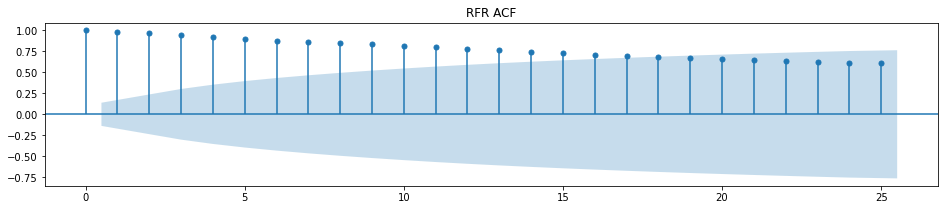

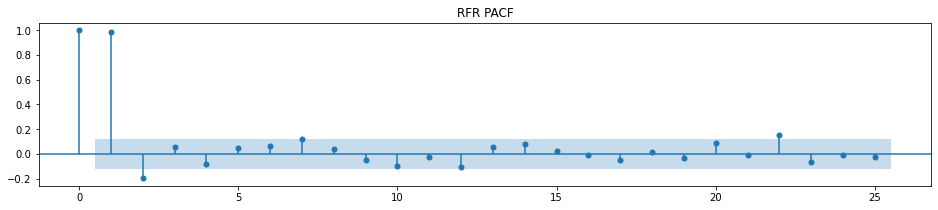

In [31]:
    fig,ax = plt.subplots(figsize=(16,3))
    plot_acf(rfr,ax=ax,lags=25,alpha=.025 )
    plt.title('{} ACF'.format("RFR"))
    fig1,ax1 = plt.subplots(figsize=(16,3))
    plot_pacf(rfr,ax=ax1,lags=25)
    plt.title('{} PACF'.format("RFR"))

In [43]:
# for rfr
p_rfr = range(0,3)
d_rfr = range(0,3)
q_rfr = range(0,3)

pdq = list(itertools.product(p_rfr,d_rfr,q_rfr))

pdqs = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p_rfr,d_rfr,q_rfr))]

len(pdq),len(pdqs)

(27, 27)

In [44]:
pdqs

[(0, 0, 0, 4),
 (0, 0, 1, 4),
 (0, 0, 2, 4),
 (0, 1, 0, 4),
 (0, 1, 1, 4),
 (0, 1, 2, 4),
 (0, 2, 0, 4),
 (0, 2, 1, 4),
 (0, 2, 2, 4),
 (1, 0, 0, 4),
 (1, 0, 1, 4),
 (1, 0, 2, 4),
 (1, 1, 0, 4),
 (1, 1, 1, 4),
 (1, 1, 2, 4),
 (1, 2, 0, 4),
 (1, 2, 1, 4),
 (1, 2, 2, 4),
 (2, 0, 0, 4),
 (2, 0, 1, 4),
 (2, 0, 2, 4),
 (2, 1, 0, 4),
 (2, 1, 1, 4),
 (2, 1, 2, 4),
 (2, 2, 0, 4),
 (2, 2, 1, 4),
 (2, 2, 2, 4)]

In [45]:
ans_rfr = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(rfr.DGS10,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           simple_differencing=False)

            output = mod.fit()
            ans_rfr.append([comb, combs, output.aic])
        except:
            continue

In [35]:
ans_df_rfr = pd.DataFrame(ans_rfr, columns=['pdq', 'pdqs', 'aic'])
ans_df_rfr.loc[ans_df_rfr['aic'].idxmin()]

pdq         (1, 0, 1)
pdqs    (0, 0, 0, 12)
aic          -2491.57
Name: 270, dtype: object

In [46]:
ans_df_rfr2 = pd.DataFrame(ans_rfr, columns=['pdq', 'pdqs', 'aic'])
ans_df_rfr2.loc[ans_df_rfr2['aic'].idxmin()]

pdq        (1, 0, 1)
pdqs    (0, 0, 0, 4)
aic         -2491.57
Name: 270, dtype: object

In [36]:
mod_rfr = sm.tsa.statespace.SARIMAX(rfr.DGS10,
                                            order=(1,0,1),
                                            seasonal_order=(0,0,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           simple_differencing=False)

output_rfr = mod_rfr.fit()

In [38]:
output_rfr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  DGS10   No. Observations:                  265
Model:               SARIMAX(1, 0, 1)   Log Likelihood                1248.783
Date:                Sun, 21 Mar 2021   AIC                          -2491.566
Time:                        21:28:58   BIC                          -2480.849
Sample:                    04-01-1996   HQIC                         -2487.259
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9942      0.004    273.412      0.000       0.987       1.001
ma.L1          0.2031      0.053      3.802      0.000       0.098       0.308
sigma2      4.392e-06   2.78e-07     15.799      0.000    3.85e-06    4.94e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                52.25
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

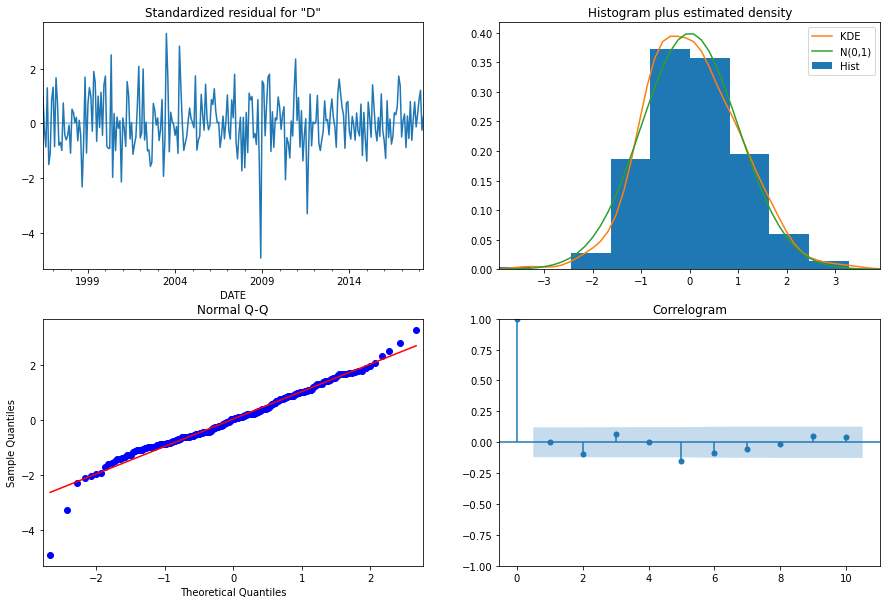

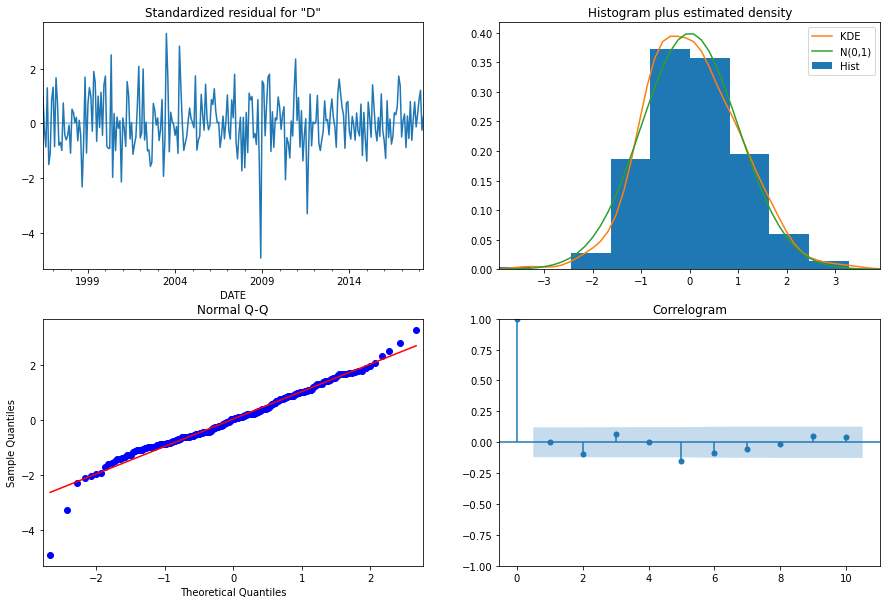

In [49]:
output_rfr.plot_diagnostics(figsize=(15,10))

In [52]:
pred_rfr = output_rfr.get_prediction(start=pd.to_datetime('2017'),dynamic=True)
pred_conf_rfr = pred_rfr.conf_int()

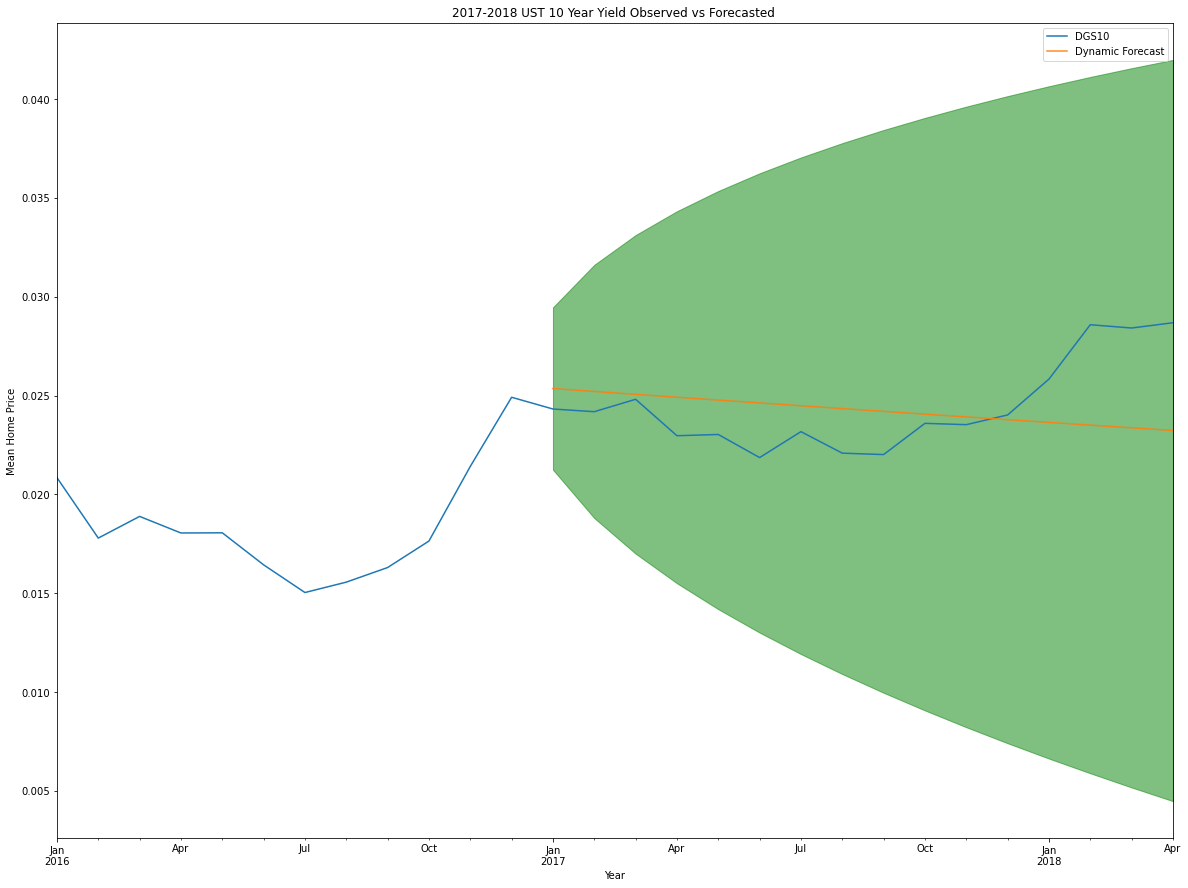

In [55]:
rcParams['figure.figsize'] = 20,15
ax = rfr['2016':].plot(kind='line',label='observed')
pred_rfr.predicted_mean.plot(kind='line',ax=ax,label='Dynamic Forecast',alpha=.9)

# Plot observed values

# Plot predicted values

# Plot the range for confidence intervals
ax.fill_between(pred_conf_rfr.index,
               pred_conf_rfr.iloc[:,0],
               pred_conf_rfr.iloc[:,1], color='g', alpha=.5)
# Set axes labelsf
ax.set_xlabel('Year')
ax.set_ylabel('Mean Home Price')
plt.title("2017-2018 UST 10 Year Yield Observed vs Forecasted ")
ax.legend()

In [59]:
forecast_rfr = pred_rfr.predicted_mean
truth_rfr = rfr['2017':].DGS10

# Compute the mean square error
mse_rfr = ((forecast_rfr -truth_rfr)**2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_rfr), 8)))

The Root Mean Squared Error of our forecasts is 0.00267493


In [61]:
1- (truth_rfr.mean()- np.sqrt(mse_rfr))

0.9782248288972338

In [62]:
# Get forecast 500 steps ahead in future
prediction_rfr = output_rfr.get_forecast(steps=60)

# Get confidence intervals of forecasts
pred_conf_rfr = prediction_rfr.conf_int()

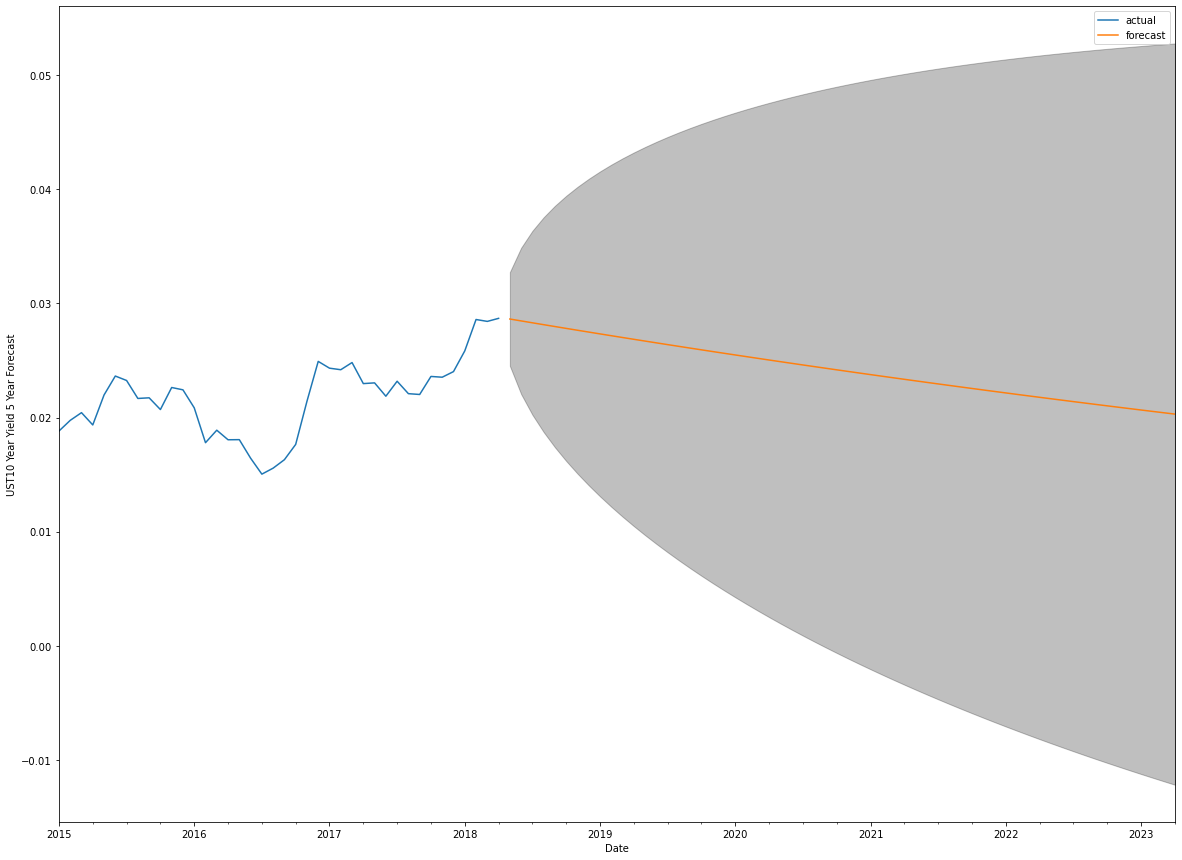

In [64]:
rcParams['figure.figsize'] = 20,15
ax = rfr['2015':].DGS10.plot(label='actual')
prediction_rfr.predicted_mean.plot(label='forecast')
ax.fill_between(pred_conf_rfr.index,
               pred_conf_rfr.iloc[:,0],
               pred_conf_rfr.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('UST10 Year Yield 5 Year Forecast')
plt.legend()
plt.show()

In [68]:
#for  92683
p_92683 = range(0,4)
d_92683 = range(0,3)
q_92683 = range(0,4)

pdq = list(itertools.product(p_92683,d_92683,q_92683))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_92683,d_92683,q_92683))]

len(pdq),len(pdqs)

(48, 48)

In [69]:
ans_92683 = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(final_zips['92683'],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           simple_differencing=False)

            output = mod.fit()
            ans_92683.append([comb, combs, output.aic])
        except:
            continue

In [70]:
ans_df_92683 = pd.DataFrame(ans_92683, columns=['pdq', 'pdqs', 'aic'])
ans_df_92683.loc[ans_df_92683['aic'].idxmin()]

pdq         (0, 2, 3)
pdqs    (0, 2, 3, 12)
aic           3324.28
Name: 539, dtype: object

In [102]:
#for Sky Lake 32809
p_80012 = range(0,4)
d_80012 = range(0,3)
q_80012 = range(0,4)


pdq = list(itertools.product(p_80012,d_80012,q_80012))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_80012,d_80012,q_80012))]

len(pdq),len(pdqs)

(48, 48)

In [103]:
ans_80012 = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(final_zips['80012'],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           simple_differencing=False)

            output = mod.fit()
            ans_80012.append([comb, combs, output.aic])
        except:
            continue

In [104]:
ans_df_80012 = pd.DataFrame(ans_80012, columns=['pdq', 'pdqs', 'aic'])
ans_df_80012.loc[ans_df_80012['aic'].idxmin()]

pdq         (0, 2, 3)
pdqs    (1, 2, 3, 12)
aic           2951.83
Name: 551, dtype: object

In [164]:
ans_df_80012.sort_values('aic').head(30)

,pdq,pdqs,aic
551,"(0, 2, 3)","(1, 2, 3, 12)",2951.825561
1127,"(1, 2, 3)","(1, 2, 3, 12)",2953.852179
539,"(0, 2, 3)","(0, 2, 3, 12)",2963.599451
1115,"(1, 2, 3)","(0, 2, 3, 12)",2969.097857
1691,"(2, 2, 3)","(0, 2, 3, 12)",2971.799015
503,"(0, 2, 2)","(1, 2, 3, 12)",2976.338768
1079,"(1, 2, 2)","(1, 2, 3, 12)",2978.531483
923,"(1, 1, 3)","(0, 2, 3, 12)",2981.857033
1067,"(1, 2, 2)","(0, 2, 3, 12)",2982.535221
491,"(0, 2, 2)","(0, 2, 3, 12)",2984.015645


In [193]:
mod_80012 = sm.tsa.statespace.SARIMAX(final_zips['80012'],
                                            order=(5,1,1),
                                            seasonal_order=(1,2,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           simple_differencing=False)

output_80012 = mod_80012.fit()


In [194]:
output_80012.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               80012   No. Observations:                  265
Model:             SARIMAX(5, 1, 1)x(1, 2, [], 12)   Log Likelihood               -1746.280
Date:                             Mon, 22 Mar 2021   AIC                           3508.560
Time:                                     07:35:46   BIC                           3535.817
Sample:                                 04-01-1996   HQIC                          3519.563
                                      - 04-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.4004      0.078     30.785      0.000       2.248       2.553
ar.L2         -2.1062      0.178    -11.828      0.000      -2.455      -1.757
ar.L3          0.9149      0.204      4.480      0.000       0.515       1.315
ar.L4         -0.2474      0.170     -1.454      0.146      -0.581       0.086
ar.L5          0.0243      0.070      0.348      0.728      -0.113       0.161
ma.L1         -0.9792      0.022    -45.217      0.000      -1.022      -0.937
ar.S.L12      -0.6592      0.063    -10.394      0.000      -0.784      -0.535
sigma2      4.815e+05   4.88e+04      9.871      0.000    3.86e+05    5.77e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                26.71
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):              18.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.11e+14. Standard errors may be unstable.
"""

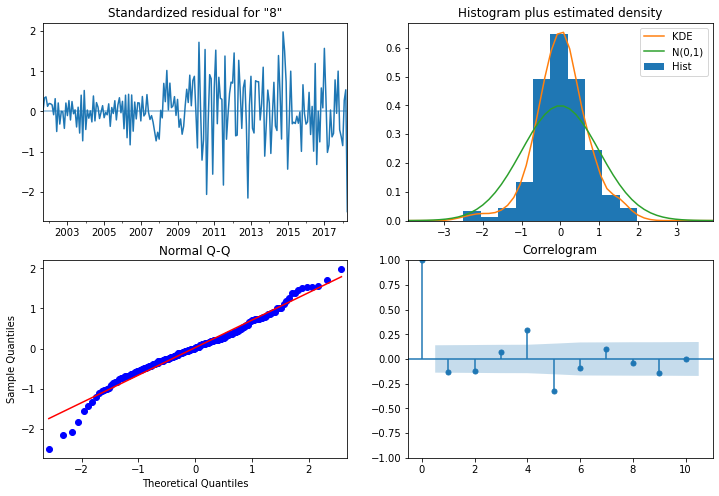

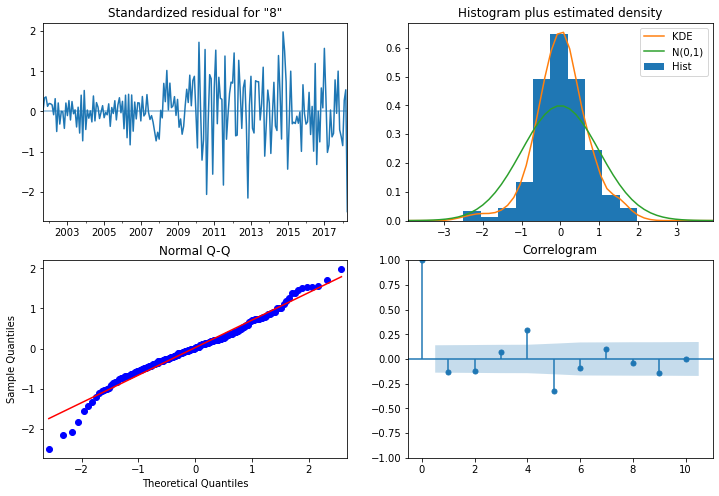

In [178]:
output_80012.plot_diagnostics()

In [179]:

pred_80012 = output_80012.get_prediction(start=pd.to_datetime('2017'),dynamic=True)
pred_conf_80012 = pred_80012.conf_int()

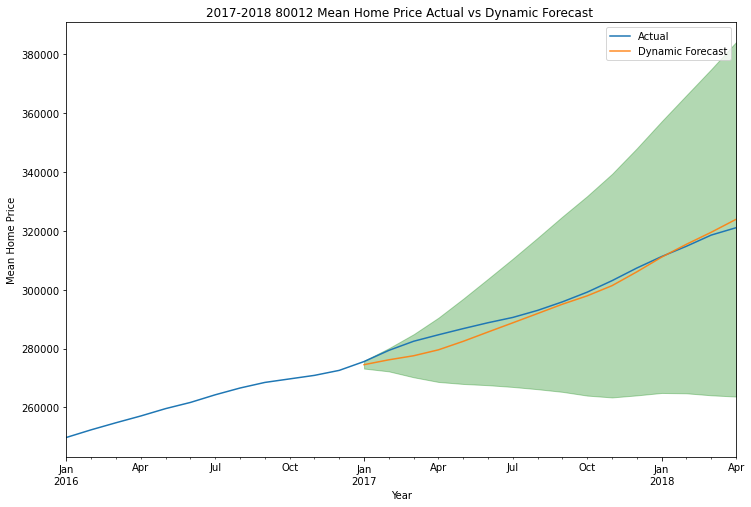

In [180]:
rcParams['figure.figsize'] = 12,8
ax = final_zips['2016':]['80012'].plot(kind='line',label='Actual')
pred_80012.predicted_mean.plot(kind='line',ax=ax,label='Dynamic Forecast',alpha=.9)

# Plot observed values

# Plot predicted values

# Plot the range for confidence intervals
ax.fill_between(pred_conf_80012.index,
               pred_conf_80012.iloc[:,0],
               pred_conf_80012.iloc[:,1], color='g', alpha=.3)
# Set axes labelsf
ax.set_xlabel('Year')
ax.set_ylabel('Mean Home Price')
plt.title("2017-2018 80012 Mean Home Price Actual vs Dynamic Forecast ")
ax.legend()

In [181]:
forecast_80012 = pred_80012.predicted_mean
truth_80012 = final_zips['2017':]['80012']

# Compute the mean square error
mse_80012 = ((forecast_80012 -truth_80012)**2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_80012), 2)))

The Root Mean Squared Error of our forecasts is 2637.4


In [170]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr

    return({'mape':mape, 'rmse':rmse, 
            'corr':corr})

In [182]:
forecast_accuracy(forecast_80012,truth_80012)

{'mape': 0.00737873556040059,
 'rmse': 2637.4026483072594,
 'corr': 0.996720979722035}

In [183]:
# Get forecast 500 steps ahead in future
prediction_80012 = output_80012.get_forecast(steps=60)

# Get confidence intervals of forecasts
pred_conf_80012 = prediction_80012.conf_int(alpha=.1)

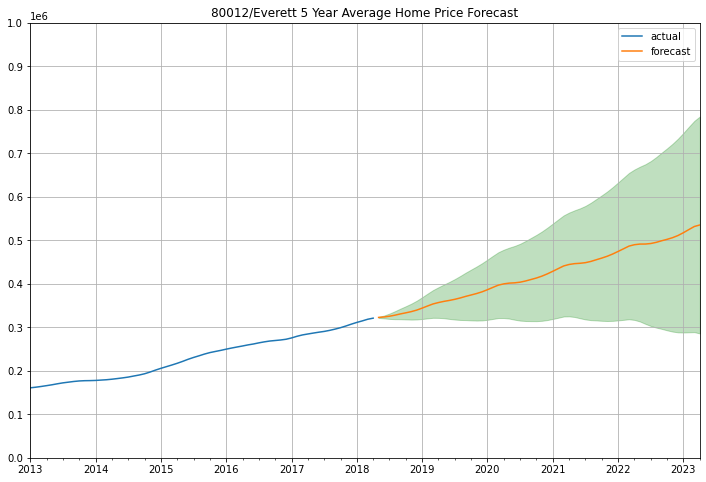

In [184]:
rcParams['figure.figsize'] = 12,8
ax = final_zips['2013':]['80012'].plot(label='actual')
prediction_80012.predicted_mean.plot(label='forecast')
ax.fill_between(pred_conf_80012.index,
               pred_conf_80012.iloc[:,0],
               pred_conf_80012.iloc[:,1],color='g',alpha=.25)
plt.title('80012/Everett 5 Year Average Home Price Forecast')
plt.yticks(np.linspace(0,1000000,num=11,dtype=int))
plt.ylim(0,1000000)
plt.legend()
plt.grid(which='major')
plt.show()